# Classical iterative methods

Consider solving
$$
-u_{xx} = f(x), \qquad x \in [0,1]
$$
with boundary condition
$$
u(0) = u(1) = 0
$$
Choose
$$
f(x) = 1
$$
The exact solution is
$$
u(x) = \frac{1}{2}x(1-x)
$$
Make a partition of $n$ intervals with spacing and grid points
$$
h = \frac{1}{n}, \qquad x_i = i h, \qquad i=0,1,\ldots,n
$$
The finite difference scheme is
$$
-\frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2} = f_i, \qquad i=1,2,\ldots,n-1
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

The next function computes the residual norm defined as
$$
\frac{ \sum_{i=1}^{n-1} \left[ \frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2} + f_i \right]^2 }{ \sum_{i=1}^{n-1}f_i^2 }
$$

In [2]:
def residual(h,u,f):
    n = len(u) - 1
    rnorm, fnorm = 0.0, 0.0
    for i in range(1,n):
        r = f[i] + (u[i-1]-2*u[i]+u[i+1])/h**2
        rnorm += r**2; fnorm += f[i]**2
    return np.sqrt(rnorm/fnorm)

We first define some problem parameters.

In [3]:
xmin, xmax = 0.0, 1.0
n = 50

h = (xmax - xmin)/n
x = np.linspace(xmin, xmax, n+1)
f = np.ones(n+1)
ue= 0.5*x*(1-x)

TOL   = 1.0e-6
itmax = 10000

## Gauss Jacobi method

For $m=1,2,\ldots$
$$
u_i^m = \frac{1}{2}[ h^2 f_i + u_{i-1}^{m-1} + u_{i+1}^{m-1}], \qquad i=1,2,\ldots,n-1
$$

Number of iterations = 6946


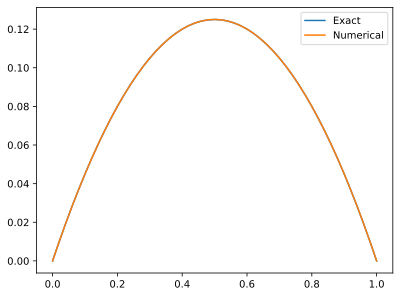

In [4]:
uold = np.zeros(n+1) # at m-1
unew = np.zeros(n+1) # at m

for it in range(itmax):
    uold[:] = unew
    for i in range(1,n):
        unew[i] = 0.5*(h**2*f[i] + uold[i-1] + uold[i+1])
    change = residual(h,unew,f)
    if change < TOL:
        break

print("Number of iterations = %d" % it)

plt.plot(x,ue,x,unew)
plt.legend(("Exact","Numerical"));

## Gauss-Seidel method

For $m=1,2,\ldots$
$$
u_i^m = \frac{1}{2}[ h^2 f_i + u_{i-1}^{m} + u_{i+1}^{m-1}], \qquad i=1,2,\ldots,n-1
$$

Number of iterations = 3474


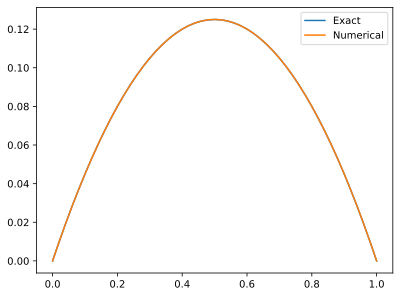

In [5]:
u = np.zeros(n+1)

for it in range(itmax):
    for i in range(1,n):
        u[i] = 0.5*(h**2*f[i] + u[i-1] + u[i+1])
    change = residual(h,u,f)
    if change < TOL:
        break

print("Number of iterations = %d" % it)

plt.plot(x,ue,x,u)
plt.legend(("Exact","Numerical"));

## SOR method

For $m=1,2,\ldots$
$$
z_i = \frac{1}{2}[ h^2 f_i + u_{i-1}^{m} + u_{i+1}^{m-1}], \quad u_i^m = (1-\omega)u_i^{m-1} + \omega z_i, \qquad i=1,2,\ldots,n-1
$$

Number of iterations = 146


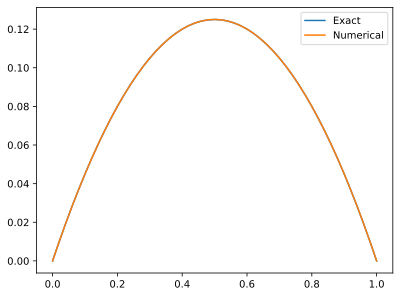

In [6]:
omega = 2.0/(1 + np.sin(np.pi*h))

u = np.zeros(n+1)

for it in range(itmax):
    for i in range(1,n):
        z = 0.5*(h**2*f[i] + u[i-1] + u[i+1])
        u[i] = (1-omega)*u[i] + omega*z
    change = residual(h,u,f)
    if change < TOL:
        break

print("Number of iterations = %d" % it)

plt.plot(x,ue,x,u)
plt.legend(("Exact","Numerical"));

## SSOR method

For $m=1,2,\ldots$
$$
z_i = \frac{1}{2}[ h^2 f_i + u_{i-1} + u_{i+1}], \quad u_i = (1-\omega)u_i + \omega z_i, \qquad i=1,2,\ldots,n-1
$$
$$
z_i = \frac{1}{2}[ h^2 f_i + u_{i-1} + u_{i+1}], \quad u_i = (1-\omega)u_i + \omega z_i, \qquad i=n-1,n-2, \ldots,1
$$

Number of iterations = 226


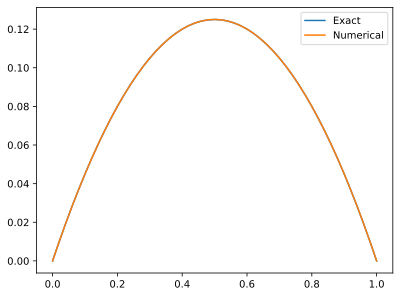

In [7]:
omega = 2.0/(1 + np.sin(np.pi*h))

u = np.zeros(n+1)

for it in range(itmax):
    for i in range(1,n): # forward loop
        z = 0.5*(h**2*f[i] + u[i-1] + u[i+1])
        u[i] = (1-omega)*u[i] + omega*z
    for i in range(n-1,0,-1): # backward loop
        z = 0.5*(h**2*f[i] + u[i-1] + u[i+1])
        u[i] = (1-omega)*u[i] + omega*z
    change = residual(h,u,f)
    if change < TOL:
        break

print("Number of iterations = %d" % it)

plt.plot(x,ue,x,u)
plt.legend(("Exact","Numerical"));

SSOR is not better than optimal SOR. But it is useful as a preconditioner for CG.